In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import csv
import openpyxl


In [145]:
# ignorar avisos
import warnings
# Suprimir apenas o SettingWithCopyWarning
warnings.filterwarnings('ignore')

In [146]:
solicitacoes_credito = pd.read_csv('Arquivos/solicitacoescredito.csv')

solicitacoes_credito.head()


,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [147]:
print(solicitacoes_credito.columns)

Index(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'cnpjSemTraco',
       'maiorAtraso', 'margemBrutaAcumulada', 'percentualProtestos',
       'primeiraCompra', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'definicaoRisco',
       'diferencaPercentualRisco', 'percentualRisco', 'dashboardCorrelacao',
       'valorAprovado', 'dataAprovadoEmComite', 'periodoBalanco',
       'ativoCirculante', 'passivoCirculante', 'totalAtivo',
       'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber',
       'estoque', 'faturamentoBruto', 'margemBruta',
       'periodoDemonstrativoEmMeses', 'custos', 'anoFundacao',
       'intervaloFundacao', 'capitalSocial', 'restricoes', 'empresa_MeEppMei',
       'scorePontualidade', 'limiteEmpresaAnaliseCredito',
       'dataAprovadoNivelAnalista'],
      dtype='object')


In [162]:
solicitacoes_credito_lp = solicitacoes_credito[solicitacoes_credito['status'] != 'DocumentacaoReprovada']

status = solicitacoes_credito_lp['status']
status = status.drop_duplicates()
status

0            AprovadoAnalista
11             AprovadoComite
27          ReprovadoAnalista
118           ReprovadoComite
2057    EmAnaliseDocumentacao
8963      AguardandoAprovacao
Name: status, dtype: object

In [163]:
clientes = solicitacoes_credito[['faturamentoBruto', 'totalPatrimonioLiquido', 'endividamento', 'estoque']]

clientes

,faturamentoBruto,totalPatrimonioLiquido,endividamento,estoque
0,1766880.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,2814940.0,NaN,NaN,NaN
3,1285274.0,NaN,NaN,NaN
4,40779757.0,14544378.0,3039112.0,3047791.0
...,...,...,...,...
8968,NaN,NaN,NaN,NaN
8969,NaN,NaN,NaN,NaN
8970,NaN,NaN,NaN,NaN
8971,NaN,NaN,NaN,NaN


In [164]:
clientes1 = clientes.drop_duplicates()

display(clientes1)


,faturamentoBruto,totalPatrimonioLiquido,endividamento,estoque
0,1766880.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,2814940.0,NaN,NaN,NaN
3,1285274.0,NaN,NaN,NaN
4,40779757.0,14544378.0,3039112.0,3047791.0
...,...,...,...,...
8956,3410070.0,NaN,NaN,NaN
8957,1366363.0,2322332.0,0.0,38112.0
8958,133280394.0,1893943.0,74793.0,5718842.0
8959,4887005.0,905806.0,1257000.0,1316604.0


In [165]:
# clientes2_1 = clientes2.fillna(0)
# 
# # print(clientes2.columns)
# clientes2_1
clientesM = clientes1
# Calcular a média do faturamento por cliente
moda_faturamento = clientesM['faturamentoBruto'].mode()[0]
moda_patrimonio = clientesM['totalPatrimonioLiquido'].mode()[0]

clientesM



,faturamentoBruto,totalPatrimonioLiquido,endividamento,estoque
0,1766880.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,2814940.0,NaN,NaN,NaN
3,1285274.0,NaN,NaN,NaN
4,40779757.0,14544378.0,3039112.0,3047791.0
...,...,...,...,...
8956,3410070.0,NaN,NaN,NaN
8957,1366363.0,2322332.0,0.0,38112.0
8958,133280394.0,1893943.0,74793.0,5718842.0
8959,4887005.0,905806.0,1257000.0,1316604.0


In [166]:
# Substituir os valores nulos pela média do faturamento
clientesM['faturamentoBruto'] = clientesM['faturamentoBruto'].fillna(moda_faturamento)
clientesM['totalPatrimonioLiquido'] = clientesM['totalPatrimonioLiquido'].fillna(moda_patrimonio)
# clientesM[['totalPatrimonioLiquido', 'faturamentoBruto']] = clientesM[['totalPatrimonioLiquido', 'faturamentoBruto']].fillna(moda)
clientesM[['endividamento', 'estoque']] = clientesM[['endividamento', 'estoque']].fillna(0)


clientesM

,faturamentoBruto,totalPatrimonioLiquido,endividamento,estoque
0,1766880.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,2814940.0,0.0,0.0,0.0
3,1285274.0,0.0,0.0,0.0
4,40779757.0,14544378.0,3039112.0,3047791.0
...,...,...,...,...
8956,3410070.0,0.0,0.0,0.0
8957,1366363.0,2322332.0,0.0,38112.0
8958,133280394.0,1893943.0,74793.0,5718842.0
8959,4887005.0,905806.0,1257000.0,1316604.0


Clusterização

In [167]:

# X = clientesM.div(clientesM.sum(axis=1), axis='rows')
# X = X.dropna(subset=['faturamentoBruto'])
# X


In [168]:
# Descobrindo qual o melhor numero de clusters(cotovelo)
distorcions = []
n_clusters = range(2, 15)
for n_cluster2 in n_clusters:
    print(n_cluster2)
    distorcions.append(KMeans(n_clusters=n_cluster2, max_iter=10_000, n_init=100, random_state=61658).fit(clientesM).inertia_)


2
3
4
5
6
7
8
9
10
11
12
13
14


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

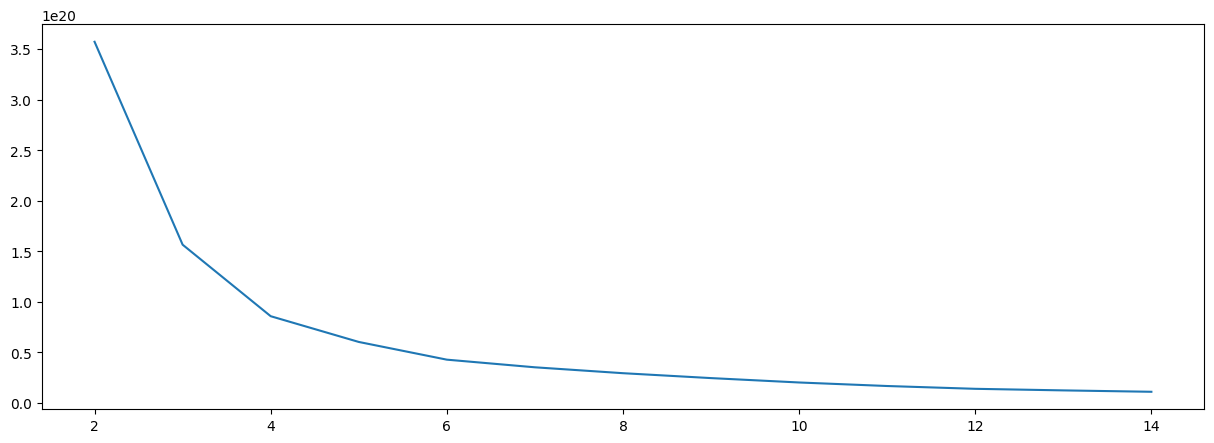

In [169]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distorcions)
plt.grid
# Aqui, consideramos o ultimo "cotovelo" que no caso é o 4

In [170]:
# Cluesterização
X = clientesM
X_array = X.to_numpy()
km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)

# X_array = clientesM.to_numpy()  # Converta para numpy se X for um DataFrame

# # Ajuste o modelo de clustering
# kmeans = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)
# kmeans.fit(X_array)

X_t = km.fit_predict(X_array)

In [171]:
clientesKM = clientesM
clientesKM.loc[:, 'cluster'] = X_t
clientesKM

,faturamentoBruto,totalPatrimonioLiquido,endividamento,estoque,cluster
0,1766880.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0
2,2814940.0,0.0,0.0,0.0,0
3,1285274.0,0.0,0.0,0.0,0
4,40779757.0,14544378.0,3039112.0,3047791.0,0
...,...,...,...,...,...
8956,3410070.0,0.0,0.0,0.0,0
8957,1366363.0,2322332.0,0.0,38112.0,0
8958,133280394.0,1893943.0,74793.0,5718842.0,0
8959,4887005.0,905806.0,1257000.0,1316604.0,0


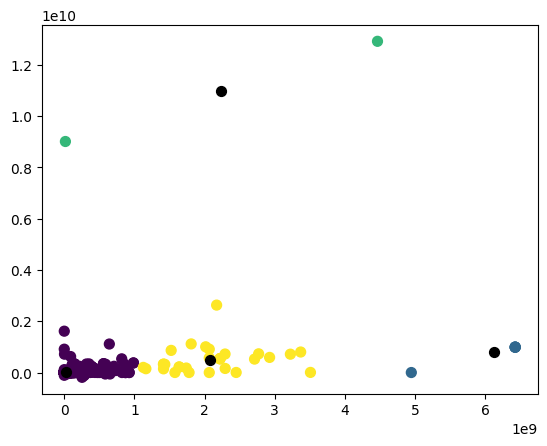

In [172]:
# Obtenha os centros dos clusters
centers = km.cluster_centers_
# centers = kmeans.cluster_centers_

plt.scatter(X_array[:, 0], X_array[:, 1], c=X_t, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, cmap='viridis')  # Use os rótulos ajustados do KMeans
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Plote os dados e os centros
# plt.scatter(X_array[:, 0], X_array[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# plt.show()

In [173]:
# Salvando em Excel
df_output = pd.DataFrame(clientesKM)

clientesKM.to_excel('Arquivos/saida.xlsx', index=False)

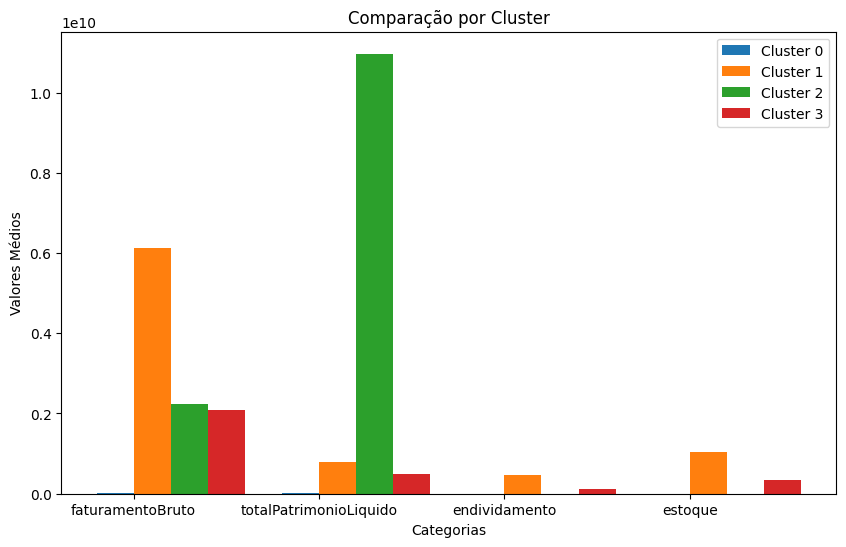

In [174]:
# Agrupando os dados por cluster e calculando a média de cada coluna
clientes_grouped = clientesM.groupby('cluster').mean()

# Definindo as categorias (campos)
categories = ['faturamentoBruto', 'totalPatrimonioLiquido', 'endividamento', 'estoque']

# Gerando o gráfico de barras para cada cluster
fig, ax = plt.subplots(figsize=(10, 6))

# Para cada cluster, crie um conjunto de barras
clusters = clientes_grouped.index
bar_width = 0.2  # Largura de cada barra
x = np.arange(len(categories))  # Posições das categorias

# Plotando as barras para cada cluster
for i, cluster in enumerate(clusters):
    ax.bar(x + i * bar_width, clientes_grouped.loc[cluster, categories], 
           width=bar_width, label=f'Cluster {cluster}')
    
# Ajustando os rótulos e a legenda
ax.set_xlabel('Categorias')
ax.set_ylabel('Valores Médios')
ax.set_title('Comparação por Cluster')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()